# Task: Create a Plot of Total Deaths, Confirmed, Recovered, and Active Cases Country-Wise where Deaths are Greater Than 150

## Problem Statement:
Write a Python program that plots the total deaths, confirmed cases, recovered cases, and active cases for each country where the total deaths are greater than 150. The plot should be a line plot, where each line represents one of the categories (deaths, confirmed, recovered, and active cases) for each country. The data should be sourced from a suitable API or dataset.

## Steps:
1. **Data Collection**:
   - Gather the dataset for COVID-19 cases worldwide. You can use a public API (like `https://api.covid19api.com/`) or a local CSV/Excel file containing country-wise COVID-19 data.
   
2. **Filter the Data**:
   - Filter out countries where the total number of deaths is greater than 150.
   
3. **Data Extraction**:
   - Extract the data for total deaths, confirmed cases, recovered cases, and active cases for each country that meets the condition (deaths > 150).

4. **Data Visualization**:
   - Use libraries like `matplotlib` or `seaborn` to create a line plot with:
     - The x-axis representing countries.
     - The y-axis representing the number of cases.
     - Multiple lines representing different categories: total deaths, confirmed, recovered, and active cases.

5. **Show the Plot**:
   - Display the plot with a legend to distinguish between the lines for each case type.
   
6. **Optional**:
   - Add labels and titles to make the plot more informative (e.g., title: "COVID-19 Statistics by Country (Deaths > 150)").


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv', usecols=['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])

In [3]:
covid_data

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,2020-03-19T10:13:14,67800,3130,57682
1,Italy,2020-03-19T17:43:03,41035,3405,4440
2,Iran,2020-03-19T11:33:29,18407,1284,5710
3,Spain,2020-03-19T20:13:08,17963,830,1107
4,Germany,2020-03-19T20:13:08,15320,44,113
...,...,...,...,...,...
323,United Kingdom,2020-03-19T10:13:14,0,11,0
324,Nauru,2020-03-19T10:13:14,0,0,0
325,New Zealand,2020-03-19T10:13:14,0,0,0
326,Tuvalu,2020-03-19T10:13:14,0,0,0


In [4]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [5]:
r_data = (
    covid_data.groupby("Country/Region")[["Deaths", "Confirmed", "Recovered", "Active"]]
    .sum()
    .reset_index()
)

In [6]:
r_data = r_data.sort_values(by='Deaths', ascending=False)

In [7]:
r_data = r_data[r_data['Deaths'] > 50]

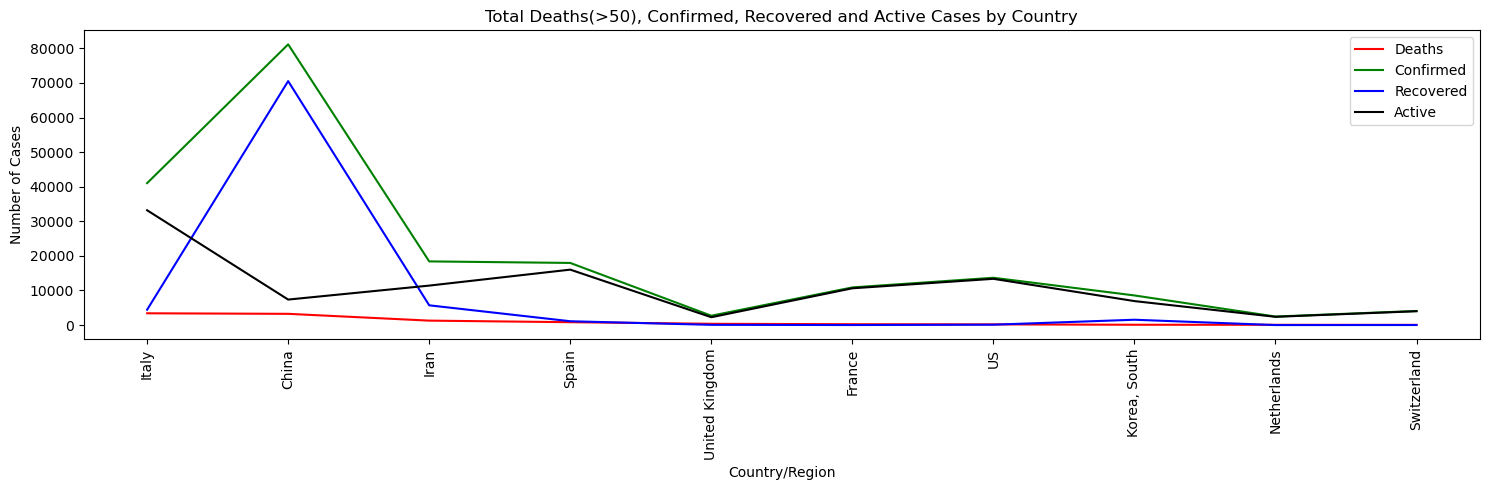

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'], color='red', label='Deaths')
plt.plot(r_data['Country/Region'], r_data['Confirmed'], color='green', label='Confirmed')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue', label='Recovered')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black', label='Active')

plt.title('Total Deaths(>50), Confirmed, Recovered and Active Cases by Country')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()